In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

## DataFrame

#### How to create a dataframe?  It could be created through passing different ways : dictionay of list or ndarrays, 2d ndarray and so on...
#### “ 因为有了标号，所以好提取 ”

### How to create one?

In [3]:
df = pd.DataFrame({'Student_1':[90,100, 95], 'Student_2':[60, 80, 100]}, index=['Monday', 'Wednesday', 'Friday'])

In [4]:
df

,Student_1,Student_2
Monday,90,60
Wednesday,100,80
Friday,95,100


In [5]:
df1 = pd.DataFrame([[1, 2, 3], [4, 5, 6]], index=['A', 'B'], columns=['C1', 'C2', 'C3'])

In [6]:
df1

,C1,C2,C3
A,1,2,3
B,4,5,6


In [7]:
df1.values

array([[1, 2, 3],
       [4, 5, 6]], dtype=int64)

In [8]:
df1.index

Index(['A', 'B'], dtype='object')

In [9]:
df1.columns

Index(['C1', 'C2', 'C3'], dtype='object')

In [10]:
df1.T

,A,B
C1,1,4
C2,2,5
C3,3,6


In [11]:
df1.shape

(2, 3)

In [12]:
df1.size

6

### Method

In [15]:
df1.head(2)

,C1,C2,C3
A,1,2,3
B,4,5,6


In [16]:
df1.tail(1)

,C1,C2,C3
B,4,5,6


In [17]:
df1.describe()

,C1,C2,C3
count,2.00000,2.00000,2.00000
mean,2.50000,3.50000,4.50000
std,2.12132,2.12132,2.12132
min,1.00000,2.00000,3.00000
25%,1.75000,2.75000,3.75000
50%,2.50000,3.50000,4.50000
75%,3.25000,4.25000,5.25000
max,4.00000,5.00000,6.00000


In [18]:
df1.loc['B']

C1    4
C2    5
C3    6
Name: B, dtype: int64

In [19]:
df1

,C1,C2,C3
A,1,2,3
B,4,5,6


In [20]:
df1.loc['B'].loc['C2']  # loc works on index

5

In [21]:
df1['C2'].loc['B']

5

In [22]:
df1.loc['B', 'C2']

5

In [23]:
df1.iloc[1, 1]     # iloc works on position (only take integers)

5

In [24]:
df1 + 10 * 15     # element-wise operations

,C1,C2,C3
A,151,152,153
B,154,155,156


In [25]:
df1['C2'] = df1.apply(lambda x: x['C2'] ** 2 + 10, axis=1)

In [26]:
df1

,C1,C2,C3
A,1,14,3
B,4,35,6


In [30]:
df1.assign(C2 = lambda x: x['C2'] ** 2 + 10,\
           C3 = lambda x: x['C3'] * 2 - 10).loc['A'] .max()

206

In [28]:
df1

,C1,C2,C3
A,1,14,3
B,4,35,6


In [ ]:
# describe, operation (+-*/), apply, set_index/value
# where, mask (fillna)
# sort_index, sort_value
# query

In [ ]:
# select
# filter (where)   => subset
# join

## Titanic example

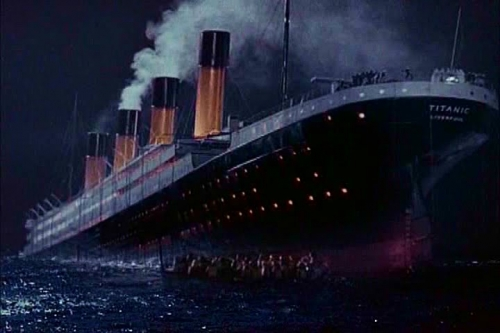

In [20]:
from IPython.display import Image
Image("./S.O.S._Titanic_Ship_Sinking.jpg")
# picture retrieves from https://vignette.wikia.nocookie.net/titanic/images/5/50/S.O.S._Titanic_Ship_Sinking.jpg/revision/latest?cb=20150309223733

In [22]:
df = pd.read_csv('train.csv')

In [23]:
df.shape

(891, 12)

In [24]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [28]:
df.shape

(891, 12)

In [18]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [26]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

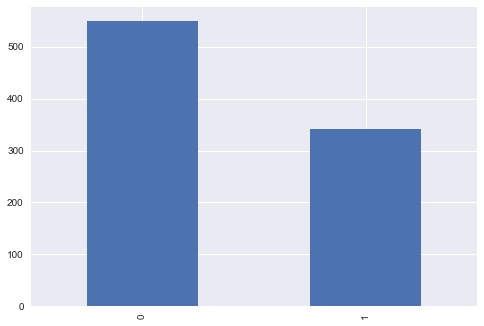

In [40]:
df.Survived.value_counts().plot(kind='bar')

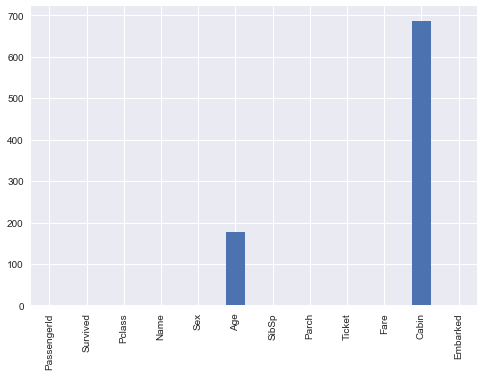

In [41]:
df.isnull().sum().plot(kind='bar')

## How to deal with missing value ?

### drop them or fill them with some value

In [43]:
df1 = df.drop('Cabin', axis=1)

In [44]:
df1['Age'] = df1['Age'].fillna(20)

In [45]:
df2 = df1[df1['Embarked'].notnull()]

In [50]:
# missing value removal
df3 = df.drop('Cabin', axis=1).assign(Age = lambda x: x['Age'].fillna(20))

In [51]:
df3=df3.loc[df3['Embarked'].notnull()]

In [52]:
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [39]:
# Exploration (basic statistics)

In [40]:
df1.loc[10:14, ['Name', 'Sex', 'Survived']]

,Name,Sex,Survived
10,"Sandstrom, Miss. Marguerite Rut",female,1
11,"Bonnell, Miss. Elizabeth",female,1
12,"Saundercock, Mr. William Henry",male,0
13,"Andersson, Mr. Anders Johan",male,0
14,"Vestrom, Miss. Hulda Amanda Adolfina",female,0


In [46]:
df3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [53]:
df3.pivot_table(values='PassengerId', index='Survived', columns='Sex', aggfunc='count')

Sex,female,male
Survived,,
0,81,468
1,231,109


In [54]:
df4 = df3.loc[df3['Survived'] == 1]
df4.shape

(340, 11)

In [55]:
df3.shape

(889, 11)

In [63]:
df3 = df1.loc[df1['Age'] > 30]
df3.shape

(303, 11)

In [45]:
df4 = df2[['PassengerId', 'Name']].merge(df3[['PassengerId', 'Age']], on='PassengerId', how='outer')
df4.shape

(519, 3)

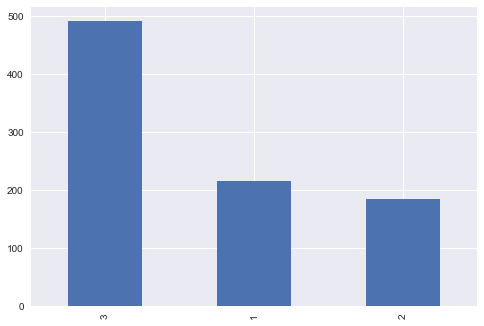

In [57]:
df['Pclass'].value_counts().plot.bar()

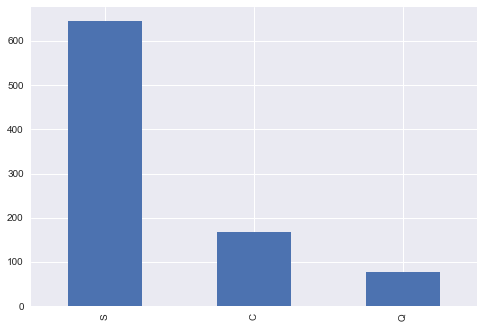

In [56]:
df['Embarked'].value_counts().plot.bar()

In [59]:
df['Survived'].corr(df['Pclass'])

-0.33848103596101536